In [8]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import KBinsDiscretizer


In [2]:
#import data used in the analysis
df_metrics = pd.read_csv('Data/metrics_corr.csv')

In [3]:
#import metrics data and merge with participant info
df_charts = pd.read_csv('Data/metrics.csv')
df_charts['id'] = df_charts['id'].astype(str)
#.str[:-2]
info = pd.read_csv('Data/ads_data/participant_info.csv')
info['ID'] = info['ID'].astype(str).str[:-2]
info = info[['ID','DoB','Gender']]

In [4]:
df_charts = df_charts.merge(info, left_on = 'id', right_on = 'ID', how = 'left')
df_charts = df_charts.drop(['ID','Unnamed: 0'], axis = 1)

In [5]:
df_charts.head()

,id,fixations,fixmap,aim_nss,aim_auc,aim_ig,aim_cc,aim_kl,aim_sauc,aim_sim,...,dgii_sim,icf_nss,icf_auc,icf_ig,icf_cc,icf_kl,icf_sauc,icf_sim,DoB,Gender
0,202107101214363,"[[288.8, 199.7], [1292.7, 915.9], [354.9, 946....",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,-0.173250,0.411120,-2.305416,-0.003296,5.056150,0.422562,0.000405,...,0.000418,0.114301,0.507494,-2.188486,0.002919,4.983279,0.448937,0.000436,1974,MALE
1,202107101432200,"[[891.4, 672.8], [1223.4, 744.5], [956.8, 167....",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,0.224671,0.538412,-2.087863,0.004922,5.159385,0.560382,0.000518,...,0.000476,0.420799,0.630459,-2.100955,0.009112,5.083071,0.568972,0.000498,1999,FEMALE
2,202107101444503,"[[848.5, 851.7], [1400.1, 871.9], [1472.3, 295...",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,0.686180,0.686619,-2.062538,0.014210,5.054440,0.714630,0.000539,...,0.000482,0.252469,0.566422,-2.277651,0.005538,4.979120,0.504005,0.000442,1978,MALE
3,202107101528378,"[[908.6, 304.9], [238.5, 226.8], [1354.1, 827....",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,0.343402,0.564721,-2.492345,0.006796,5.055164,0.584228,0.000482,...,0.000483,0.194748,0.559170,-2.561761,0.003959,4.979163,0.492652,0.000439,1994,MALE
4,202107111045352,"[[921.4, 688.4], [117.9, 985.6], [211.4, 463.1...",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,-0.083830,0.428131,-2.281806,-0.002085,5.340200,0.434062,0.000555,...,0.000560,0.011351,0.486064,-2.204089,0.000274,5.263394,0.421690,0.000574,1975,MALE


In [6]:
#drop columns that use the kl metric
kl_list = [col for col in df_metrics.columns if col.endswith('_kl')]
df_metrics.drop(kl_list, axis=1, inplace=True)

In [7]:
#filter out all data from participants born before 1972 and after 2011
df_metrics = df_metrics[(df_metrics['DoB'] >= 1972) & (df_metrics['DoB'] <= 2011)]

In [9]:
#create 4 roughly equal bins for age
est = KBinsDiscretizer(n_bins=4, encode='ordinal', 
                       strategy='quantile')
est.fit_transform(df_metrics[['DoB']])

array([[0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.],
       [2.],
       [2.],
       [0.],
       [3.],
       [2.],
       [3.],
       [0.],
       [3.],
       [2.],
       [0.],
       [0.],
       [3.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [2.],
       [2.],
       [0.],

In [10]:
#check edges of each bin
est.bin_edges_[0]

array([1972.  , 1983.25, 1994.  , 2000.  , 2011.  ])

(array([134., 115., 147., 138.]),
 array([1972.  , 1983.25, 1994.  , 2000.  , 2011.  ]),
 <BarContainer object of 4 artists>)

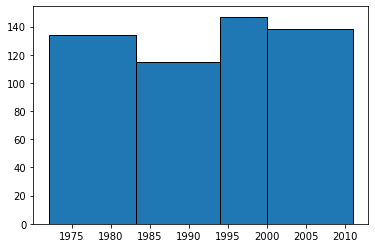

In [11]:
#plot the 4 bins
plt.hist(df_metrics['DoB'], est.bin_edges_[0], edgecolor='black')

In [7]:
#create age bins
df_metrics.loc[(df_metrics['DoB']>1971) & (df_metrics['DoB']<=1983), 'age_class'] = 0
df_metrics.loc[(df_metrics['DoB']>1983) & (df_metrics['DoB']<=1994), 'age_class'] = 1
df_metrics.loc[(df_metrics['DoB']>1994) & (df_metrics['DoB']<=2000), 'age_class'] = 2
df_metrics.loc[(df_metrics['DoB']>2000) & (df_metrics['DoB']<=2011), 'age_class'] = 3

In [8]:
df_metrics['age_class'] = pd.to_numeric(df_metrics['age_class'], downcast = 'integer')
df_metrics = df_metrics[df_metrics.age_class.isnull() == False]

In [9]:
#encode age and gender variables
le = LabelEncoder()
df_metrics['age_var'] = le.fit_transform(df_metrics['age_class'])
df_metrics['gender_var'] = le.fit_transform(df_metrics['Gender'])

In [10]:
#create lists that store column names for each saliency map
aim_list = [col for col in df_metrics.columns if col.startswith('aim_')]
rare_list = [col for col in df_metrics.columns if col.startswith('rare_')]
qss_list = [col for col in df_metrics.columns if col.startswith('qss_')]
lds_list = [col for col in df_metrics.columns if col.startswith('lds_')]
imsig_list = [col for col in df_metrics.columns if col.startswith('imsig_')]
ikn_list = [col for col in df_metrics.columns if col.startswith('ikn_')]
gbvs_list = [col for col in df_metrics.columns if col.startswith('gbvs_')]
gaus_list = [col for col in df_metrics.columns if col.startswith('gauss_')]
fes_list = [col for col in df_metrics.columns if col.startswith('fes_')]
dva_list = [col for col in df_metrics.columns if col.startswith('dva_')]
cvs_list = [col for col in df_metrics.columns if col.startswith('cvs_')]
cas_list = [col for col in df_metrics.columns if col.startswith('cas_')]
dgi_list = [col for col in df_metrics.columns if col.startswith('dgi_')]
dgii_list = [col for col in df_metrics.columns if col.startswith('dgii_')]
dgiie_list = [col for col in df_metrics.columns if col.startswith('dgiie_')]
icf_list = [col for col in df_metrics.columns if col.startswith('icf_')]
all_pred = icf_list + dgiie_list + dgii_list + dgi_list + cas_list + cvs_list + dva_list + fes_list + gbvs_list + ikn_list + imsig_list + lds_list + qss_list + rare_list + aim_list
used_cols = ['dva_cc','dva_nss', 'dgiie_nss', 'lds_cc', 'lds_nss', 'qss_sauc', 'imsig_sauc','qss_auc', 'cvs_nss',
             'cvs_cc', 'gbvs_sim', 'qss_sim', 'rare_ig', 'imsig_sim', 'icf_cc','icf_nss','qss_cc','qss_nss','imsig_cc','imsig_auc',
             'dgi_ig','dva_sauc']

In [12]:
nss_list = [col for col in df_metrics.columns if col.endswith('_nss')]
auc_list = [col for col in df_metrics.columns if col.endswith('_auc')]
ig_list = [col for col in df_metrics.columns if col.endswith('_ig')]
cc_list = [col for col in df_metrics.columns if col.endswith('_cc')]
sauc_list = [col for col in df_metrics.columns if col.endswith('_sauc')]
sim_list = [col for col in df_metrics.columns if col.endswith('_sim')]

In [14]:
#check length of both dataframes
print(len(df_charts))
print(len(df_metrics))

595
534


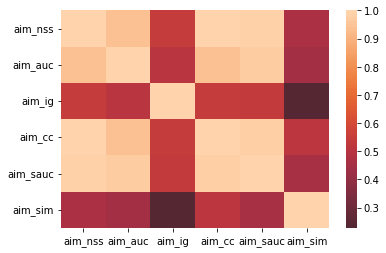

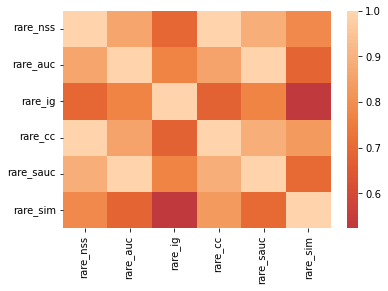

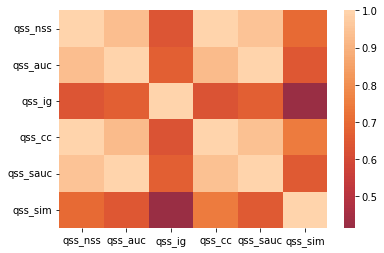

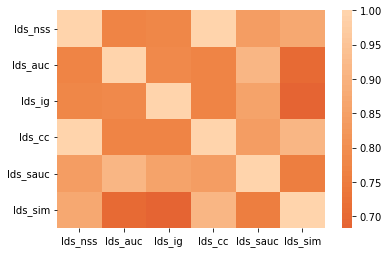

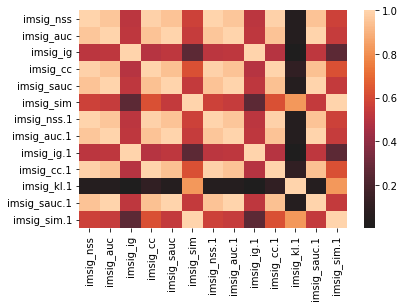

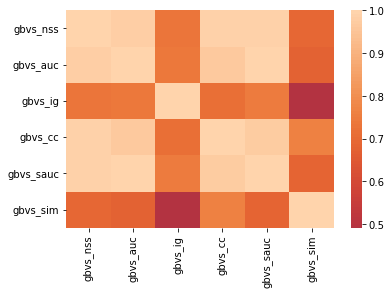

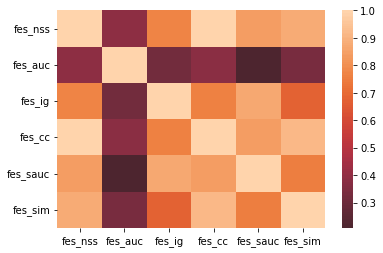

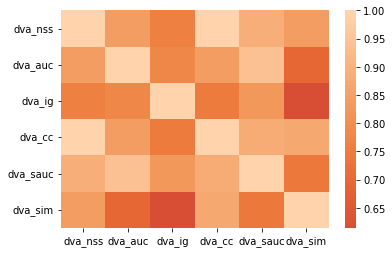

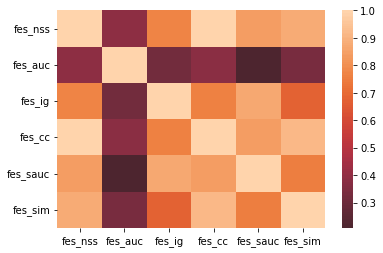

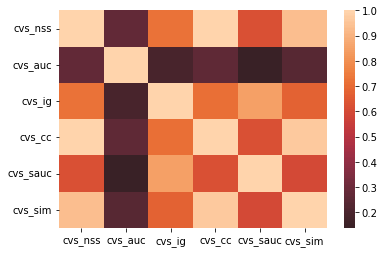

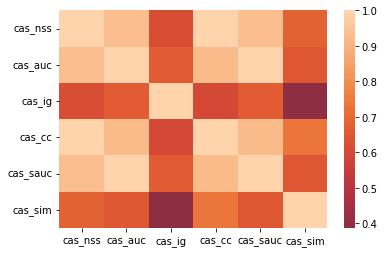

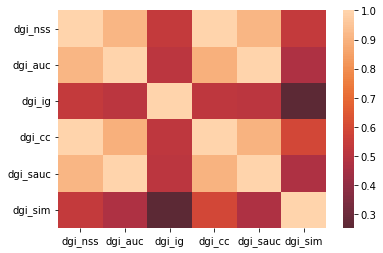

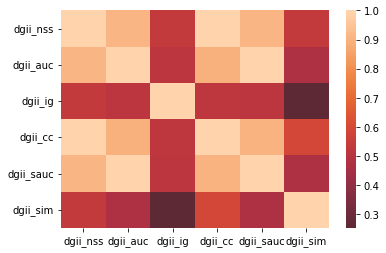

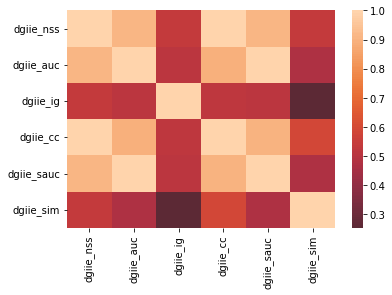

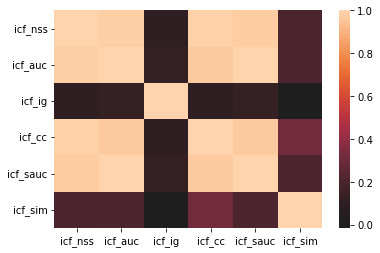

In [87]:
#create correlation heatmaps across each saliency map
sns.heatmap(df_metrics[aim_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[rare_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[qss_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[lds_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[imsig_list].corr(), center=0)
plt.show()
#sns.heatmap(df_metrics[ikn_list].corr(), center=0)
#plt.show()
sns.heatmap(df_metrics[gbvs_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[dva_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[fes_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[cvs_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[cas_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[dgi_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[dgii_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[dgiie_list].corr(), center=0)
plt.show()
sns.heatmap(df_metrics[icf_list].corr(), center=0)
plt.show()

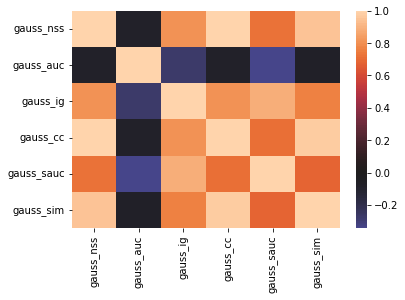

In [94]:
sns.heatmap(df_metrics[gaus_list].corr(), center=0)
plt.show()

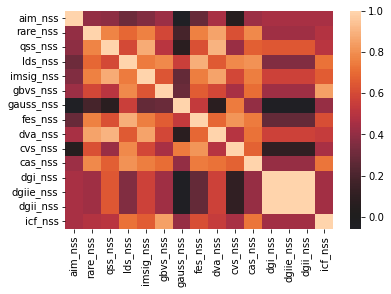

In [72]:
#create correlation heatmaps across each nss metric

sns.heatmap(df_metrics[nss_list].corr(), center=0)
plt.show()

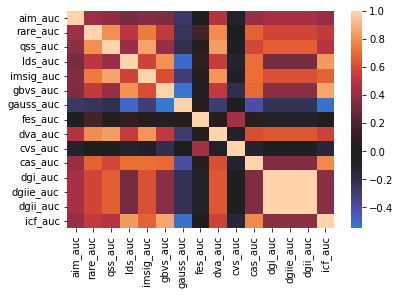

In [73]:
#create correlation heatmaps across each auc metric

sns.heatmap(df_metrics[auc_list].corr(), center=0)
plt.show()

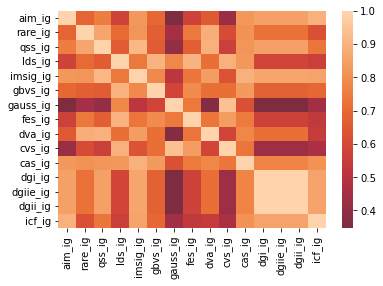

In [74]:
#create correlation heatmaps across each ig metric

sns.heatmap(df_metrics[ig_list].corr(), center=0)
plt.show()

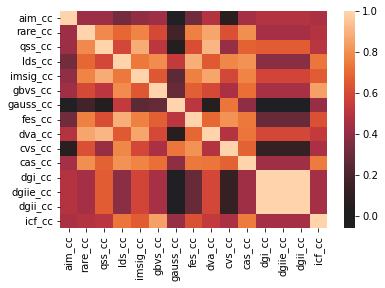

In [75]:
#create correlation heatmaps across each cc metric

sns.heatmap(df_metrics[cc_list].corr(), center=0)
plt.show()

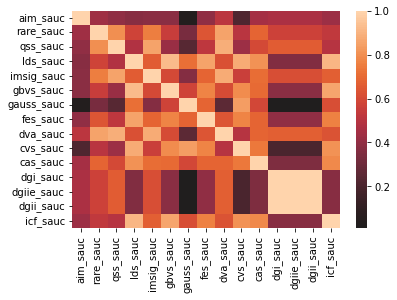

In [76]:
#create correlation heatmaps across each sauc metric

sns.heatmap(df_metrics[sauc_list].corr(), center=0)
plt.show()

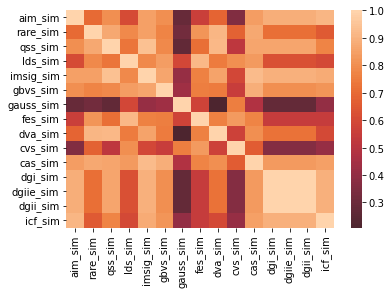

In [29]:
#create correlation heatmaps across each sim metric

sns.heatmap(df_metrics[sim_list].corr(), center=0)
plt.show()

In [123]:
#reduce data to 2 dimensions using pca

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_metrics[all_pred].values)
df_metrics['pca-one'] = pca_result[:,0]
df_metrics['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47780207 0.15361575]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

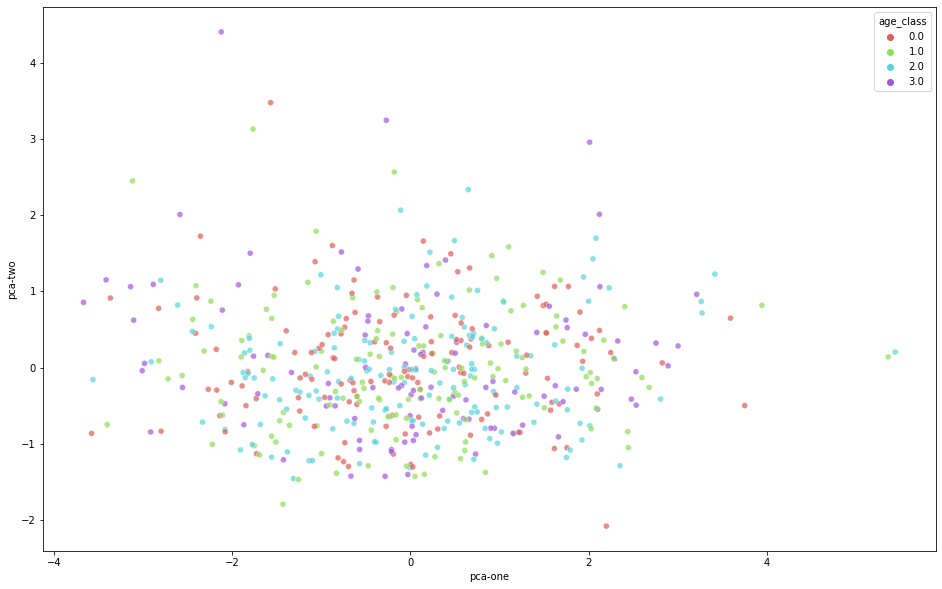

In [124]:
#plot 2d data with age as colour

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="age_class",
    palette=sns.color_palette("hls", 4),
    data=df_metrics,
    legend="full",
    alpha=0.7
)

In [29]:
#plot data in 2 dimensions using tsne (all predictors)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_metrics[all_pred])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\njeri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\njeri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 534 samples in 0.008s...
[t-SNE] Computed neighbors for 534 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 534 / 534
[t-SNE] Mean sigma: 0.615343
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.035690
[t-SNE] KL divergence after 300 iterations: 0.956924
t-SNE done! Time elapsed: 1.8392603397369385 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

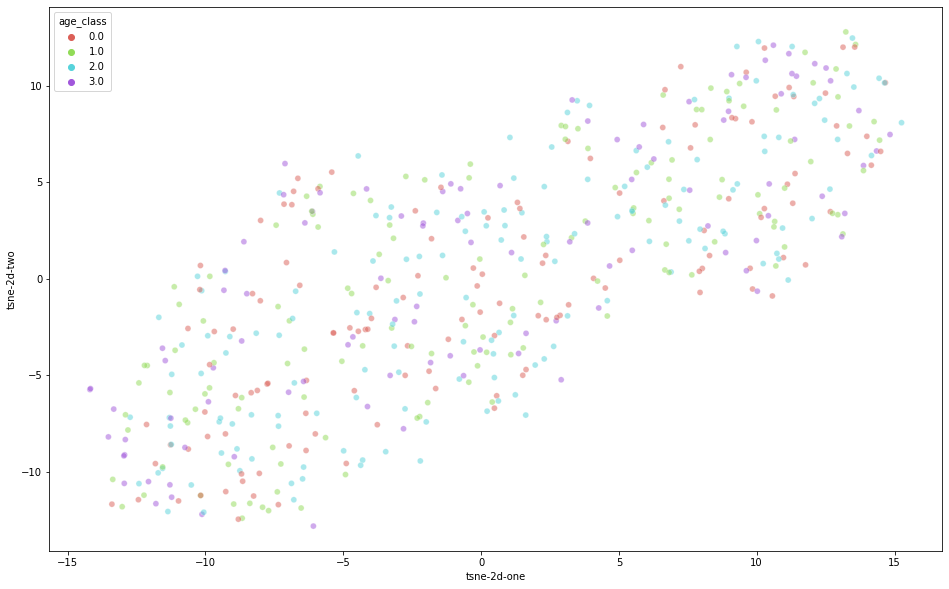

In [30]:
df_metrics['tsne-2d-one'] = tsne_results[:,0]
df_metrics['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="age_class",
    palette=sns.color_palette("hls", 4),
    data=df_metrics,
    legend="full",
    alpha=0.5
)

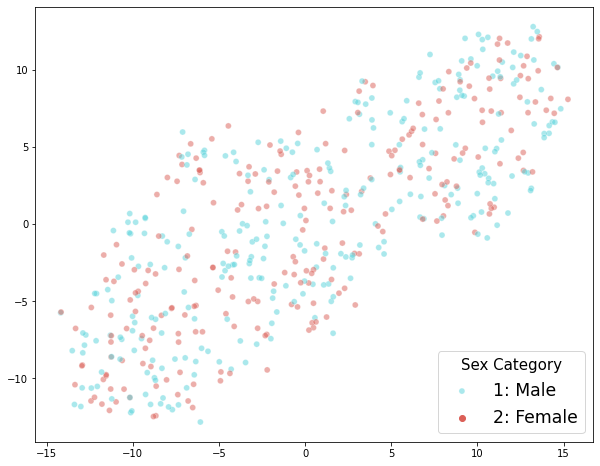

In [37]:
df_metrics['tsne-2d-one1'] = tsne_results_1[:,0]
df_metrics['tsne-2d-two1'] = tsne_results_1[:,1]
plt.figure(figsize=(10,8))
p2 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="gender_var",
    palette=sns.color_palette("hls", 2),
    data=df_metrics,
    legend="full",
    alpha=0.5
)
p2.set(xlabel=None)
p2.set(ylabel=None)
plt.legend(title='Sex Category', loc='lower right', labels=['1: Male','2: Female'],fontsize='xx-large', title_fontsize='15')
plt.savefig('C:\\Users\\njeri\\Documents\\Masters\\Thesis\\Draft\\Images\\sex tsne.png');

In [127]:
#reduce data to 3 dimensions using pca and plot in 3d with age as colour
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_metrics[all_pred].values)
df_metrics['pca-one'] = pca_result[:,0]
df_metrics['pca-two'] = pca_result[:,1] 
df_metrics['pca-three'] = pca_result[:,2] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47780207 0.15361575 0.1192291 ]


C:\Users\njeri\AppData\Local\Temp/ipykernel_94420/107224227.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


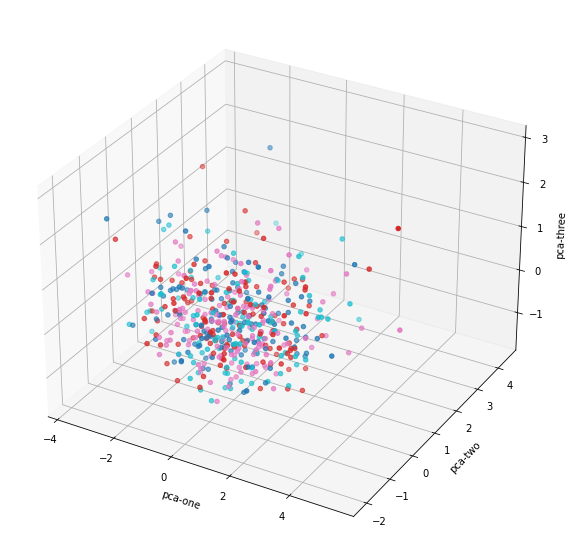

In [128]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_metrics["pca-one"], 
    ys=df_metrics["pca-two"], 
    zs=df_metrics["pca-three"], 
    c=df_metrics["age_class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

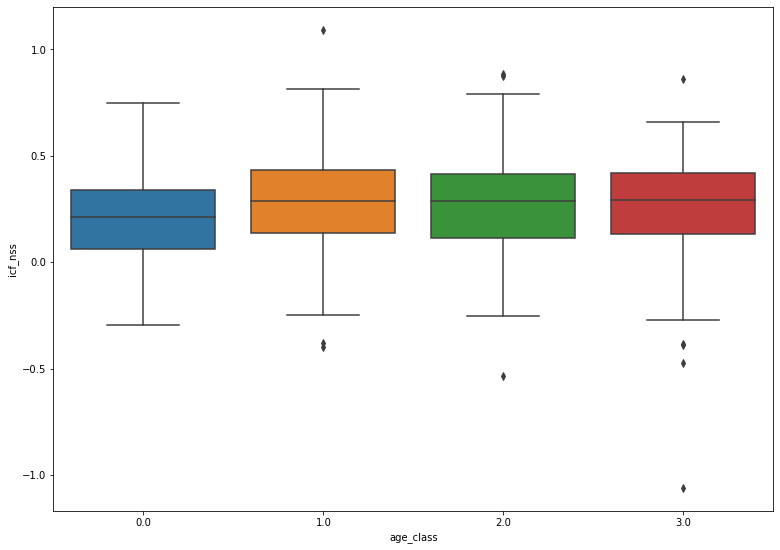

In [20]:
#boxplot of 1 variable across each age class
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(x = df_metrics['age_class'], y = df_metrics['icf_nss']);
#, hue = df_metrics['Gender']

In [16]:
#means of dgiie variables for each age class
df_metrics[dgiie_list + ['age_class']].groupby("age_class").mean()

,dgiie_nss,dgiie_auc,dgiie_ig,dgiie_cc,dgiie_sauc,dgiie_sim
age_class,,,,,,
0.0,0.150552,0.535449,-2.218832,0.003194,0.495041,0.000461
1.0,0.173803,0.543326,-2.238531,0.003721,0.502784,0.000471
2.0,0.170072,0.535811,-2.204918,0.003593,0.495023,0.000478
3.0,0.181497,0.545635,-2.177059,0.003841,0.502482,0.000475


In [19]:
df_metrics[icf_list + ['age_class']].groupby("age_class").mean()

,icf_nss,icf_auc,icf_ig,icf_cc,icf_sauc,icf_sim
age_class,,,,,,
0.0,0.213133,0.549572,-2.195175,0.004417,0.484156,0.000444
1.0,0.284640,0.572346,-2.225205,0.006006,0.507180,0.000453
2.0,0.261761,0.565530,-2.184205,0.005551,0.501280,0.000461
3.0,0.239036,0.556556,-2.167751,0.005147,0.491030,0.000454


In [21]:
df_metrics[qss_list + ['age_class']].groupby("age_class").mean()

,qss_nss,qss_auc,qss_ig,qss_cc,qss_sauc,qss_sim
age_class,,,,,,
0.0,0.157977,0.538579,-2.271284,0.003411,0.489829,0.000478
1.0,0.189958,0.555779,-2.276409,0.003981,0.506209,0.000489
2.0,0.154060,0.538051,-2.269679,0.003185,0.489918,0.000488
3.0,0.260151,0.563306,-2.190084,0.005619,0.515920,0.000514


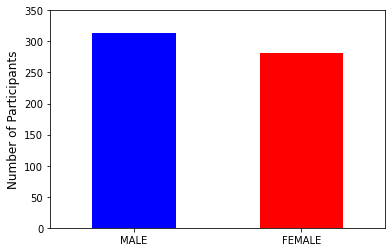

In [18]:
#create chart that shows gender distribution before data cleaning
df_charts['Gender'].value_counts().plot(kind='bar', color=('b','r'))
plt.xticks(rotation=0)
plt.ylim(ymax = 350, ymin = 0)
plt.ylabel('Number of Participants', fontsize = 12)
#plt.xlabel('Sex', fontsize = 12)
plt.savefig('C:\\Users\\njeri\\Documents\\Masters\\Thesis\\Draft\\Images\\sex distribution old.png');

In [140]:
df_charts.head()

,Unnamed: 0,id,fixations,fixmap,aim_nss,aim_auc,aim_ig,aim_cc,aim_kl,aim_sauc,...,dgii_kl,dgii_sauc,dgii_sim,icf_nss,icf_auc,icf_ig,icf_cc,icf_kl,icf_sauc,icf_sim
0,0,202107101214363,"[[288.8, 199.7], [1292.7, 915.9], [354.9, 946....",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,-0.173250,0.411120,-2.305416,-0.003296,5.056150,0.422562,...,5.012198,0.396339,0.000418,0.114301,0.507494,-2.188486,0.002919,4.983279,0.448937,0.000436
1,1,202107101432200,"[[891.4, 672.8], [1223.4, 744.5], [956.8, 167....",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,0.224671,0.538412,-2.087863,0.004922,5.159385,0.560382,...,5.167955,0.423363,0.000476,0.420799,0.630459,-2.100955,0.009112,5.083071,0.568972,0.000498
2,2,202107101444503,"[[848.5, 851.7], [1400.1, 871.9], [1472.3, 295...",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,0.686180,0.686619,-2.062538,0.014210,5.054440,0.714630,...,5.063204,0.554610,0.000482,0.252469,0.566422,-2.277651,0.005538,4.979120,0.504005,0.000442
3,3,202107101528378,"[[908.6, 304.9], [238.5, 226.8], [1354.1, 827....",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,0.343402,0.564721,-2.492345,0.006796,5.055164,0.584228,...,5.063194,0.577337,0.000483,0.194748,0.559170,-2.561761,0.003959,4.979163,0.492652,0.000439
4,4,202107111045352,"[[921.4, 688.4], [117.9, 985.6], [211.4, 463.1...",[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,-0.083830,0.428131,-2.281806,-0.002085,5.340200,0.434062,...,5.348166,0.414212,0.000560,0.011351,0.486064,-2.204089,0.000274,5.263394,0.421690,0.000574


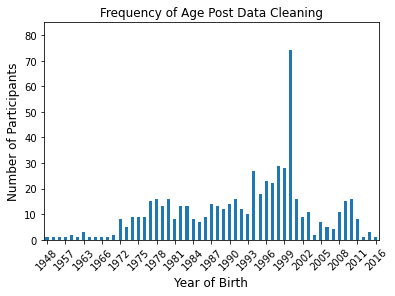

In [24]:
#create chart that shows age distribution before data cleaning

df_charts['DoB'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylim(ymax = 85, ymin = 0)
plt.ylabel('Number of Participants', fontsize = 12)
plt.xlabel('Year of Birth', fontsize = 12)
plt.locator_params(axis='x', nbins=20)
plt.title('Frequency of Age Post Data Cleaning')
plt.savefig('C:\\Users\\njeri\\Documents\\Masters\\Thesis\\Draft\\Images\\age distribution old.png');

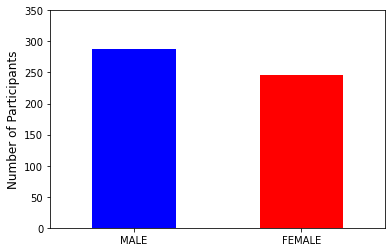

In [20]:
#create chart that shows gender distribution after data cleaning

df_metrics['Gender'].value_counts().plot(kind='bar', color=('b','r'))
plt.xticks(rotation=0)
plt.ylim(ymax = 350, ymin = 0)
plt.ylabel('Number of Participants', fontsize = 12)
#plt.xlabel('Sex', fontsize = 12)
#plt.title('Frequency of Sex Post Data Cleaning')
plt.savefig('C:\\Users\\njeri\\Documents\\Masters\\Thesis\\Draft\\Images\\sex distribution corr.png');

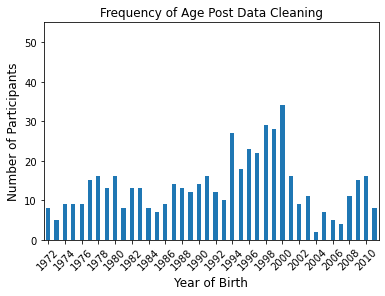

In [36]:
#create chart that shows age distribution after data cleaning

df_metrics['DoB'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylim(ymax = 55, ymin = 0)
plt.ylabel('Number of Participants', fontsize = 12)
plt.xlabel('Year of Birth', fontsize = 12)
plt.locator_params(axis='x', nbins=20)
plt.axvline(x=1983, color='k', linestyle='--')
plt.axvline(x=1994)
plt.axvline(x=2000)
plt.title('Frequency of Age Post Data Cleaning')
plt.savefig('C:\\Users\\njeri\\Documents\\Masters\\Thesis\\Draft\\Images\\age distribution ppt.png', bbox_inches = "tight");

In [155]:
#counts of gender and age before and after cleaning
df_charts.Gender.value_counts()

MALE      313
FEMALE    282
Name: Gender, dtype: int64

In [156]:
df_metrics.Gender.value_counts()

MALE      288
FEMALE    246
Name: Gender, dtype: int64

In [157]:
df_metrics.age_class.value_counts()

2.0    154
1.0    142
0.0    134
3.0    104
Name: age_class, dtype: int64

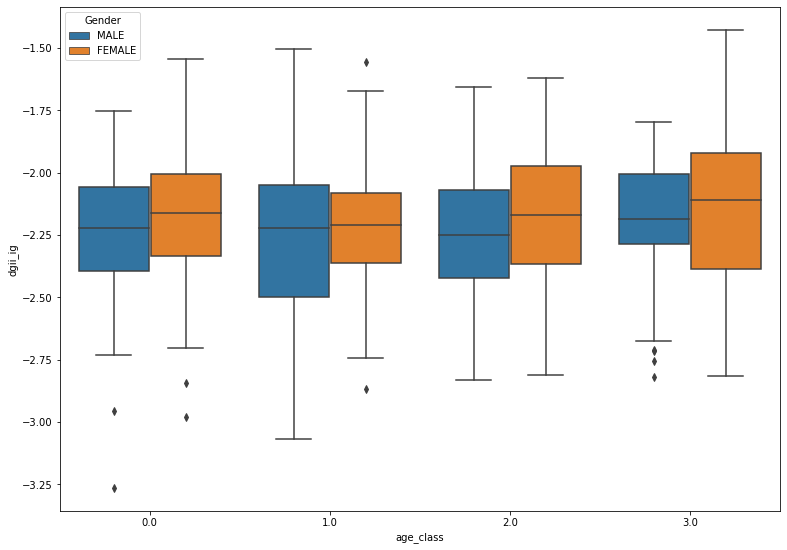

In [40]:
#boxplot of one var split by age and gender classes
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(x = df_metrics['age_class'], y = df_metrics['dgii_ig'], hue = df_metrics['Gender']);

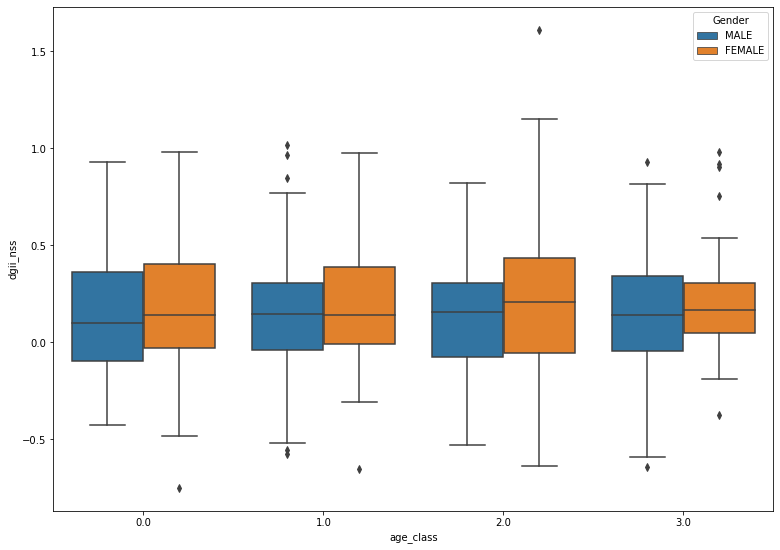

In [42]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
sns.boxplot(x = df_metrics['age_class'], y = df_metrics['dgii_nss'], hue = df_metrics['Gender']);

In [55]:
#means of some vars across age and gender
df_nss = df_metrics[nss_list + ['age_class','gender_var']]
df_nss.groupby('age_class')[nss_list].mean()

,aim_nss,rare_nss,qss_nss,lds_nss,imsig_nss,gbvs_nss,gauss_nss,fes_nss,dva_nss,cvs_nss,cas_nss,dgi_nss,dgiie_nss,dgii_nss,icf_nss
age_class,,,,,,,,,,,,,,,
0.0,0.078710,0.236477,0.157977,0.181474,0.151650,0.241529,0.159000,0.212007,0.181313,0.238998,0.192442,0.150552,0.150552,0.150552,0.213133
1.0,0.088938,0.217605,0.189958,0.198088,0.209296,0.298698,0.224042,0.208781,0.222050,0.255272,0.222587,0.173803,0.173803,0.173803,0.284640
2.0,0.058963,0.181717,0.154060,0.213439,0.174455,0.280329,0.261422,0.214045,0.166253,0.277262,0.213248,0.170072,0.170072,0.170072,0.261761
3.0,0.113821,0.238810,0.260151,0.175977,0.180362,0.245239,0.070679,0.206361,0.246544,0.167640,0.194875,0.181497,0.181497,0.181497,0.239036


In [56]:
df_nss.groupby('gender_var')[nss_list].mean()

,aim_nss,rare_nss,qss_nss,lds_nss,imsig_nss,gbvs_nss,gauss_nss,fes_nss,dva_nss,cvs_nss,cas_nss,dgi_nss,dgiie_nss,dgii_nss,icf_nss
gender_var,,,,,,,,,,,,,,,
0,0.078637,0.174811,0.153091,0.175341,0.155370,0.250470,0.213985,0.169384,0.15955,0.218511,0.204669,0.193193,0.193193,0.193193,0.251895
1,0.085935,0.251406,0.212720,0.210012,0.199458,0.284166,0.166977,0.245875,0.23549,0.259214,0.208865,0.147206,0.147206,0.147206,0.250637


In [58]:
df_cc = df_metrics[cc_list + ['age_class','gender_var']]
df_cc.groupby('age_class')[cc_list].mean()

,aim_cc,rare_cc,qss_cc,lds_cc,imsig_cc,gbvs_cc,gauss_cc,fes_cc,dva_cc,cvs_cc,cas_cc,dgi_cc,dgiie_cc,dgii_cc,icf_cc
age_class,,,,,,,,,,,,,,,
0.0,0.001624,0.004926,0.003411,0.003820,0.003224,0.004967,0.003383,0.004444,0.003853,0.005060,0.004114,0.003194,0.003194,0.003194,0.004417
1.0,0.001846,0.004561,0.003981,0.004255,0.004380,0.006316,0.004765,0.004399,0.004653,0.005404,0.004737,0.003721,0.003721,0.003721,0.006006
2.0,0.001311,0.003791,0.003185,0.004506,0.003612,0.005916,0.005604,0.004523,0.003467,0.005894,0.004515,0.003593,0.003593,0.003593,0.005551
3.0,0.002399,0.005132,0.005619,0.003896,0.003971,0.005345,0.001654,0.004519,0.005283,0.003699,0.004295,0.003841,0.003841,0.003841,0.005147


In [59]:
df_cc.groupby('gender_var')[cc_list].mean()

,aim_cc,rare_cc,qss_cc,lds_cc,imsig_cc,gbvs_cc,gauss_cc,fes_cc,dva_cc,cvs_cc,cas_cc,dgi_cc,dgiie_cc,dgii_cc,icf_cc
gender_var,,,,,,,,,,,,,,,
0,0.001625,0.003686,0.003218,0.003749,0.003258,0.005285,0.004619,0.003595,0.003336,0.004683,0.004370,0.004038,0.004038,0.004038,0.005319
1,0.001845,0.005272,0.004533,0.004489,0.004242,0.006004,0.003572,0.005216,0.004999,0.005506,0.004482,0.003179,0.003179,0.003179,0.005300
